# Fitting Models Exercise 1

## Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a quadratic curve

For this problem we are going to work with the following model:

$$ y_{model}(x) = a x^2 + b x + c $$

The true values of the model parameters are as follows:

In [3]:
a_true = 0.5
b_true = 2.0
c_true = -4.0

First, generate a dataset using this model using these parameters and the following characteristics:

* For your $x$ data use 30 uniformly spaced points between $[-5,5]$.
* Add a noise term to the $y$ value at each point that is drawn from a normal distribution with zero mean and standard deviation 2.0. Make sure you add a different random number to each point (see the `size` argument of `np.random.normal`).

After you generate the data, make a plot of the raw data (use points).

In [4]:
x = np.linspace(-5,5,30)
dy = 2.0 

np.random.seed(0)
y = a_true*x**2 +b_true*x + c_true + np.random.normal(0.0, dy, size=len(x))



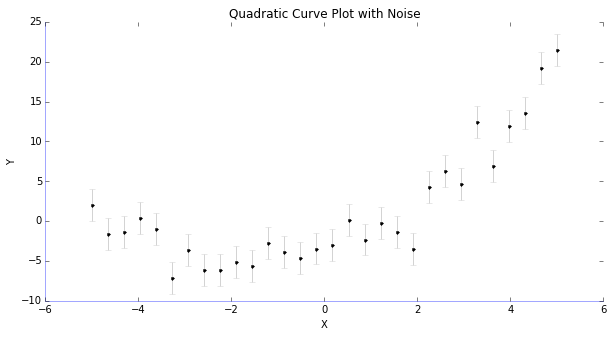

In [17]:
plt.figure(figsize=(10,5))
plt.errorbar(x, y, dy, fmt = '.k', ecolor='lightgray')
plt.ylabel("Y")
plt.xlabel("X")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('#a2a7ff')
ax.spines['left'].set_color('#a2a7ff')
plt.title("Quadratic Curve Plot with Noise")
plt.show()

In [ ]:
assert True # leave this cell for grading the raw data generation and plot

Now fit the model to the dataset to recover estimates for the model's parameters:

* Print out the estimates and uncertainties of each parameter.
* Plot the raw data and best fit of the model.

In [8]:
def model(x,a,b,c):
    return a*x**2 + b*x + c

In [9]:
theta_best, theta_cov = opt.curve_fit(model, x, y, sigma=dy)

In [10]:
print('a = {0:.3f} +/- {1:.3f}'.format(theta_best[0],np.sqrt(theta_cov[0,0])))
print('b = {0:.3f} +/- {1:.3f}'.format(theta_best[1],np.sqrt(theta_cov[1,1])))
print('c = {0:.3f} +/- {1:.3f}'.format(theta_best[2],np.sqrt(theta_cov[2,2])))

a = 0.582 +/- 0.049
b = 1.845 +/- 0.130
c = -3.843 +/- 0.581


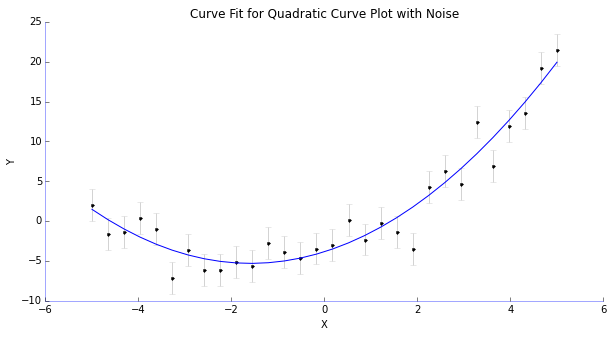

In [19]:
plt.figure(figsize=(10,5))
plt.errorbar(x, y, dy, fmt = '.k', ecolor='lightgray')
Y = theta_best[0]*x**2 + theta_best[1]*x + theta_best[2]
plt.plot(x, Y)
plt.xlabel("X")
plt.ylabel("Y")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('#a2a7ff')
ax.spines['left'].set_color('#a2a7ff')
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.title("Curve Fit for Quadratic Curve Plot with Noise")
plt.show()

In [ ]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors